In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['mathtext.fontset'] = 'stix'

# Analytic

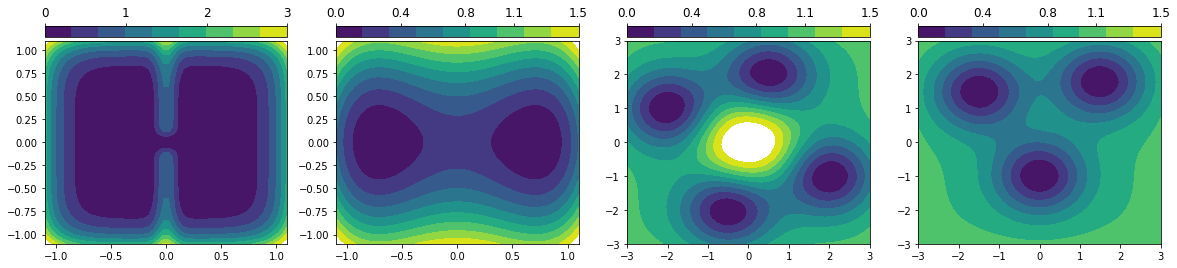

In [196]:
x0 = np.linspace(-1.1,1.1)
y0 = np.linspace(-1.1,1.1)
xv0, yv0 = np.meshgrid(x0,y0)

x1 = np.linspace(-3.,3.)
y1 = np.linspace(-3.,3.)
xv1, yv1 = np.meshgrid(x1,y1)

def G(xx, x0, w=0.8):
    """Gaussian potential"""
    A=1.0
    d_xx=xx-x0
    sqr_dxx=d_xx*d_xx
    sqr_ww=w*w
    return A*np.exp(-0.5*sqr_dxx/sqr_ww)

def entropic(xx, yy):
    return xx**6 + yy**6 + np.exp(-xx**2/0.01)*(1-np.exp(-yy**2/0.01))

def double_well(xx, yy):
    return 1.0*(xx**2-0.5)**2 + yy**2

def Diamond4s(xx, yy):
    return 0.0001*(xx**6+yy**6)-G(xx,-2.0)*G(yy,1.0)-G(xx,-0.5)*G(yy,-2.0)-G(xx,0.5)*G(yy,2.0)-G(xx,2.0)*G(yy,-1.0)+ G(xx,0.0)*G(yy,0.0) \

def Triangular3s(xx, yy):
    return 0.0001*(xx**6+yy**6)-G(xx,1.5)*G(yy,1.8)-G(xx,0.0)*G(yy,-1.0)-G(xx,-1.5)*G(yy,1.5)

def axplot(i, x, y, z, ticks, levels):
    axi = ax[i].contourf( x, y, z-np.min(z), levels=levels )
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('top', size='5%', pad='2%')
    cbr=fig.colorbar(axi, cax=cax, ticks=ticks, orientation='horizontal')
    cax.xaxis.set_ticks_position('top')
    cbr.ax.tick_params(labelsize=12)
    

fig, ax = plt.subplots(figsize=(20,4), nrows=1, ncols=4)

fE_dw=double_well(xv0, yv0)
fE_en=entropic(xv0, yv0)
fE_Dd=Diamond4s(xv1, yv1)
fE_ut=Triangular3s(xv1, yv1)

levels0=np.linspace(0.0, 3.0, 10)
levels1=np.linspace(0.0, 1.5, 10)

ticks0=np.round(np.linspace(0.0, 4.0 , 5), 1)
ticks1=np.round(np.linspace(0.0, 1.5 , 5), 1)

axplot(0, x0, y0, fE_en, ticks0, levels0)
axplot(1, x0, y0, fE_dw, ticks1, levels1)
axplot(2, x1, y1, fE_Dd, ticks1, levels1)
axplot(3, x1, y1, fE_ut, ticks1, levels1)

plt.show()

# Unbiased result

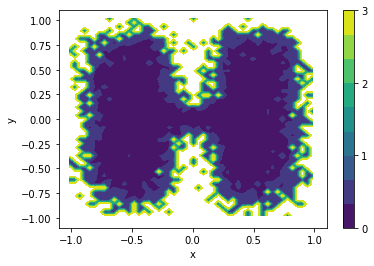

In [194]:
x,y = np.loadtxt('test_entropic/unbiased/xvyw1beta5.0gammax1.0gammay1.0_h0.01.txt', usecols = (0,1), unpack = True, skiprows=1)

beta=5.0

hist = np.histogram2d(x, y, bins=50)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels0)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks0)
plt.show()

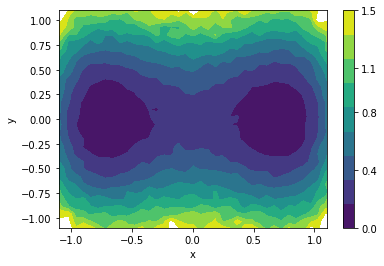

In [197]:
x,y = np.loadtxt('test_double_well/unbiased/xvyw1beta3.0gammax1.0gammay1.0_h0.1.txt', usecols = (0,1), unpack = True, skiprows=1)

beta=3.0

hist = np.histogram2d(x, y, bins=50)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks1)
plt.show()

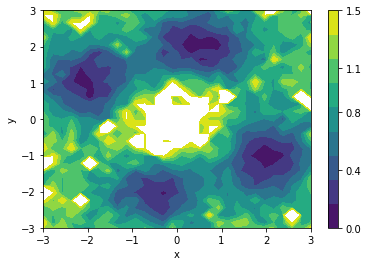

In [198]:
x,y = np.loadtxt('test_Diamond4s/unbiased/xvyw1beta2.5gammax1.0gammay1.0_h0.01.txt', usecols = (0,1), unpack = True, skiprows=1)

beta=2.5

hist = np.histogram2d(x, y, bins=50)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels1)
plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks1)
plt.show()

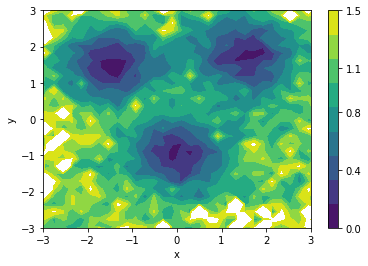

In [205]:
x,y = np.loadtxt('test_Triangular3s/unbiased/xvyw1beta2.5gammax1.0gammay1.0_h0.01.txt', usecols = (0,1), unpack = True, skiprows=1)

beta=2.5

hist = np.histogram2d(x, y, bins=50)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels1)
plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks1)
plt.show()

# Biased result

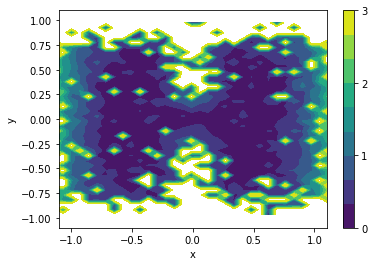

In [200]:
x,y = np.loadtxt('test_entropic/biased/xvyw1beta5.0gammax1.0gammay1.0_h0.01.txt', usecols = (0,1), unpack = True, skiprows=1)
weights = np.loadtxt('test_entropic/biased/reweighting_factor.txt')

beta=5.0

hist = np.histogram2d(x, y, bins=40, weights = weights)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels0)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks0)
plt.show()


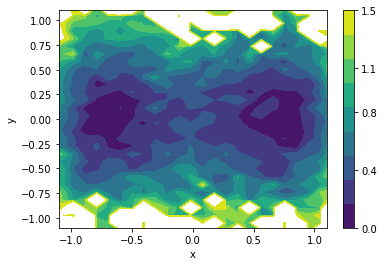

In [204]:
x,y = np.loadtxt('test_double_well/biased/xvyw1beta3.0gammax1.0gammay1.0_h0.1.txt', usecols = (0,1), unpack = True, skiprows=1)
weights = np.loadtxt('test_double_well/biased/reweighting_factor.txt')

beta=3.0

hist = np.histogram2d(x, y, bins=40, weights = weights)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks1)
plt.show()

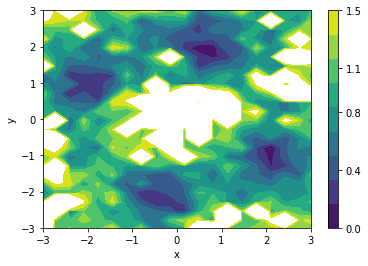

In [203]:
x,y = np.loadtxt('test_Diamond4s/biased/xvyw1beta2.5gammax1.0gammay1.0_h0.01.txt', usecols = (0,1), unpack = True, skiprows=1)
weights = np.loadtxt('test_Diamond4s/biased/reweighting_factor.txt')

beta=2.5

hist = np.histogram2d(x, y, bins=40, weights = weights)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels1)
plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks1)
plt.show()

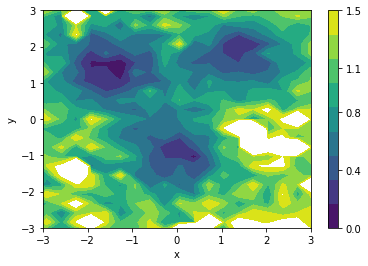

In [206]:
x,y = np.loadtxt('test_Triangular3s/biased/xvyw1beta2.5gammax1.0gammay1.0_h0.01.txt', usecols = (0,1), unpack = True, skiprows=1)
weights = np.loadtxt('test_Triangular3s/biased/reweighting_factor.txt')

beta=2.5

hist = np.histogram2d(x, y, bins=40, weights = weights)
prob = hist[0].T/np.sum(hist[0].T)
free = -(1/beta)*np.log(prob+1e-10)
mids_x, mids_y = 0.5*(hist[1][1:]+hist[1][:-1]), 0.5*(hist[2][1:]+hist[2][:-1])

plt.contourf(mids_x, mids_y, free-np.min(free), levels=levels1)
plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(ticks=ticks1)
plt.show()